In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in Data

data = pd.read_table('TaylorSwiftSongs.csv', delimiter=',')
data = data.drop('Unnamed: 0', axis=1)
data

,Title,Album,Track Number,Play Count,Duration in Seconds,Peak Chart Position,Weeks on Chart,Single,Music Video
0,Tim McGraw,Taylor Swift,1,85262261,232.106,40,20,1,1
1,Picture To Burn,Taylor Swift,2,113797531,173.066,28,20,0,0
2,Teardrops On My Guitar,Taylor Swift,3,156212871,203.040,13,48,0,0
3,A Place in this World,Taylor Swift,4,24419630,199.200,0,0,0,0
4,Cold As You,Taylor Swift,5,25443596,239.013,0,0,0,0
...,...,...,...,...,...,...,...,...,...
195,Dear Reader,Midnights,20,62966918,225.194,45,2,0,0
196,Eyes Open,Single,1,46100764,244.586,19,13,1,0
197,Highway Don't Care,Single,1,184799751,276.880,22,20,1,1
198,I Don’t Wanna Live Forever,Single,1,1361729954,247.160,0,0,0,0


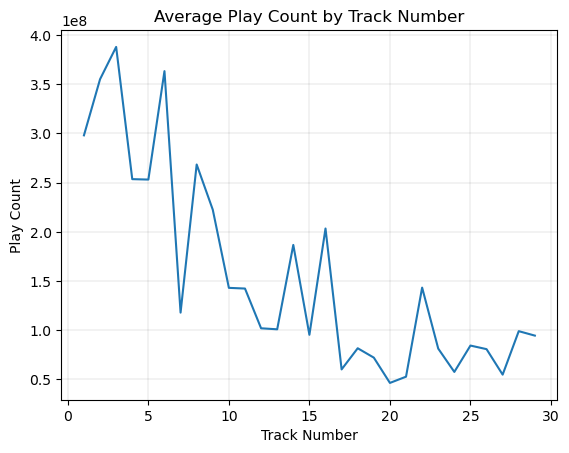

In [3]:
# Play Count by Track Number

track_avg = list(data.groupby('Track Number')['Play Count'].mean())
track = range(1,30)
ax = sns.lineplot(x=track, y=track_avg)
plt.xlabel('Track Number')
plt.ylabel('Play Count')
plt.title('Average Play Count by Track Number')
ax.grid(visible=True, which='major', color='black', linewidth=0.075);

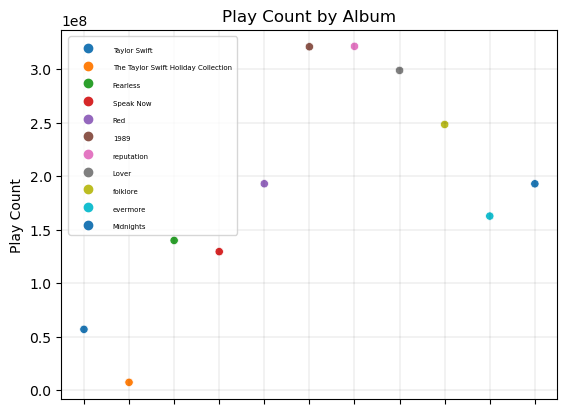

In [4]:
# Play Count by Album

album=(data['Album'].drop_duplicates()[0:11])
album_avg = data.groupby('Album', sort=False)['Play Count'].mean()[0:11]

ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
plot = sns.scatterplot(x=list(album), y=list(album_avg), hue=list(album), palette='tab10')
plt.xlabel('Album')
plt.ylabel('Play Count')
plt.title('Play Count by Album')
plt.setp(plot.get_legend().get_texts(), fontsize='5')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);

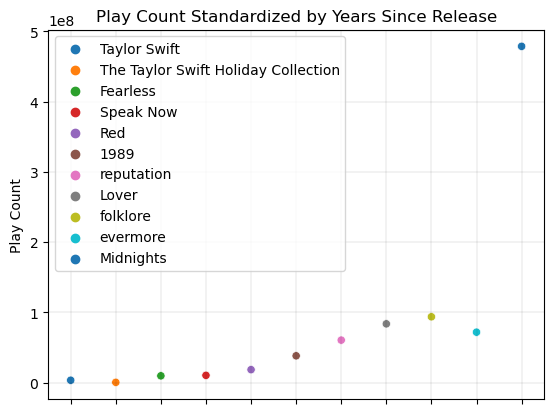

In [5]:
# Play Count by Album by Year

years = [5988/365,5633/365,5239/365,4526/365,3798/365,3063/365,1936/365,1302/365,966/365,826/365,147/365]
album_avg_1 = album_avg[0:11]
plays = album_avg_1/years
album=(data['Album'].drop_duplicates()[0:11])

ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
plot = sns.scatterplot(x=list(album), y=list(plays), hue=list(album), palette='tab10')
plt.xlabel('Album')
plt.ylabel('Play Count')
plt.title('Play Count Standardized by Years Since Release')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);

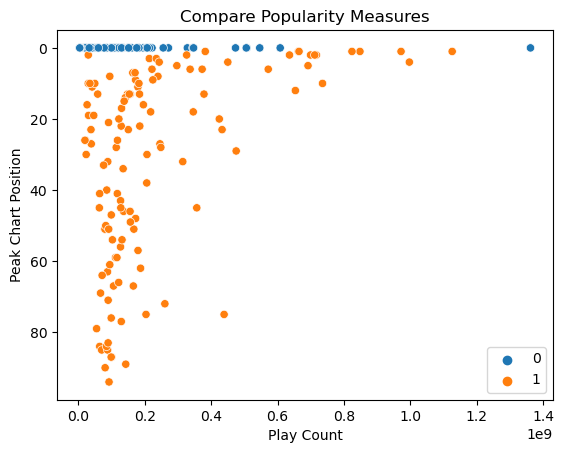

In [27]:
# Play Count v Peak Chart Position

chart = [1]*len(data)
for i in range(len(data)):
    if (data.loc[i,'Peak Chart Position']==0):
        chart[i] = 0

sns.scatterplot(x=data['Play Count'], y=data['Peak Chart Position'], hue=chart)
plt.xlabel('Play Count')
plt.ylabel('Peak Chart Position')
plt.ylim(max(data['Peak Chart Position'])+5,-5)
plt.title('Compare Popularity Measures');

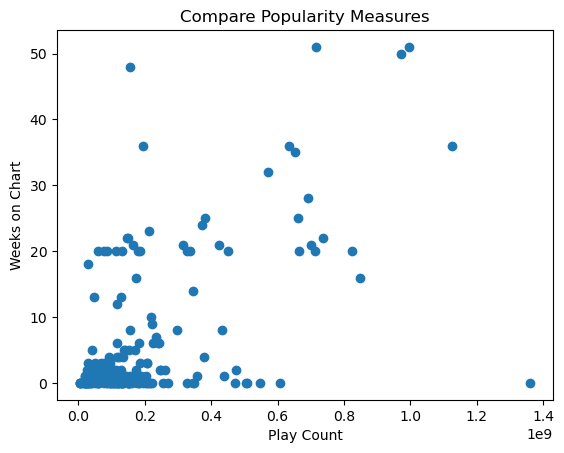

In [7]:
# Play Count v Weeks on Chart

plt.scatter(data['Play Count'], data['Weeks on Chart'])
plt.xlabel('Play Count')
plt.ylabel('Weeks on Chart')
plt.title('Compare Popularity Measures');

In [8]:
# Sorted by Play Count

data_play = data[data['Album']!='The Taylor Swift Holiday Collection']
data_play.sort_values('Play Count', axis=0)

,Title,Album,Track Number,Play Count,Duration in Seconds,Peak Chart Position,Weeks on Chart,Single,Music Video
13,A Perfectly Good Heart,Taylor Swift,14,14940401,220.146000,0,0,0,0
5,The Outside,Taylor Swift,6,16923358,207.106000,0,0,0,0
63,Superman,Speak Now,17,19560203,275.960000,26,1,1,0
6,Tied Together with a Smile,Taylor Swift,7,19793291,248.106000,0,0,0,0
38,Superstar,Fearless,18,21179845,263.865000,26,1,0,0
...,...,...,...,...,...,...,...,...,...
68,All Too Well,Red,5,848011476,423.359667,1,16,0,0
98,Shake It Off,1989,6,971787307,219.200000,1,50,1,1
23,Love Story,Fearless,3,996829747,235.516000,4,51,1,1
94,Blank Space,1989,2,1125834751,181.506000,1,36,1,1


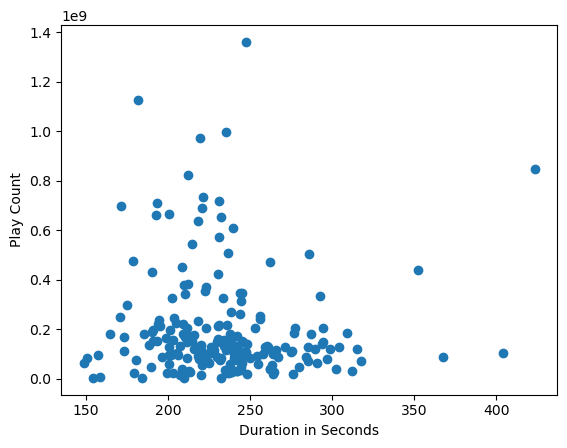

In [9]:
# Play Count by Duration in Seconds

plt.scatter(data['Duration in Seconds'], data['Play Count'])
plt.xlabel('Duration in Seconds')
plt.ylabel('Play Count');

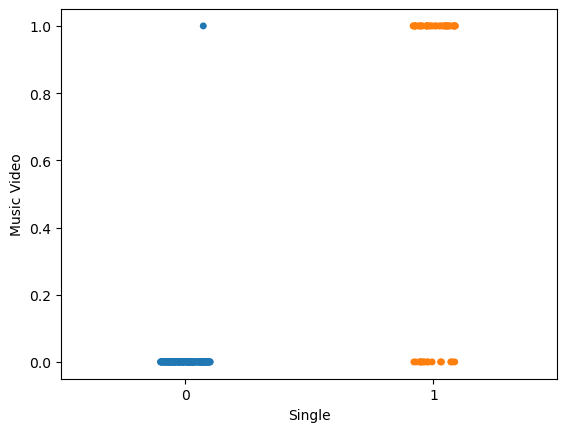

In [10]:
# Singles vs Music Videos

sns.stripplot(x='Single',y='Music Video',data=data);

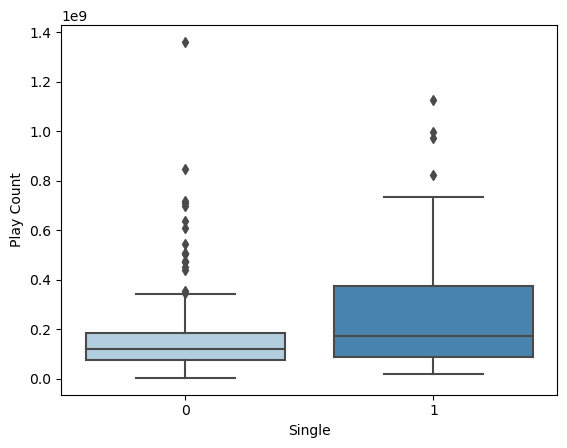

In [11]:
# Play Count v Single

sns.boxplot(x=data['Single'],y=data['Play Count'], palette='Blues');

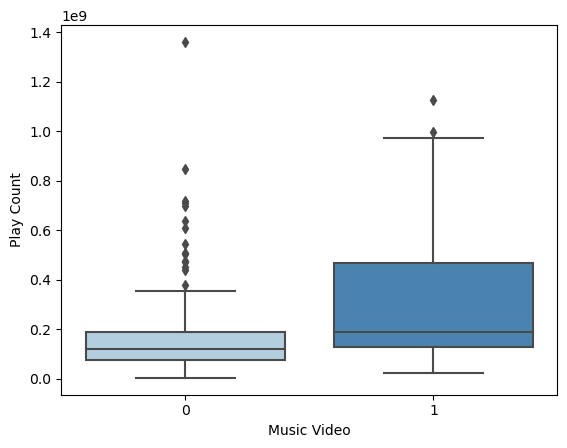

In [12]:
# Play Count v Music Video

sns.boxplot(x=data['Music Video'],y=data['Play Count'], palette='Blues');

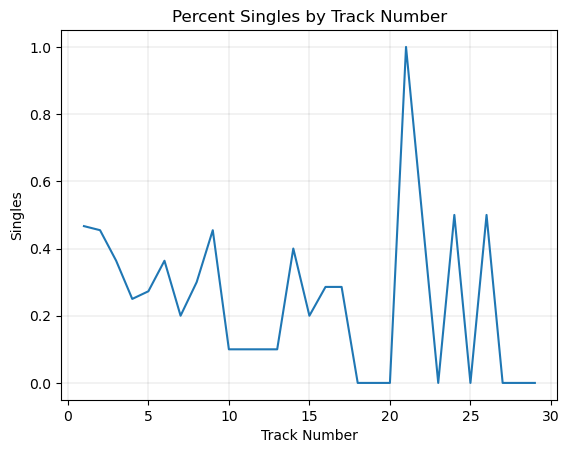

In [13]:
# Singles v Tract Number

track_avg = list(data.groupby('Track Number')['Single'].mean())
track = range(1,30)
ax = sns.lineplot(x=track, y=track_avg)
plt.xlabel('Track Number')
plt.ylabel('Singles')
plt.title('Percent Singles by Track Number')
ax.grid(visible=True, which='major', color='black', linewidth=0.075);

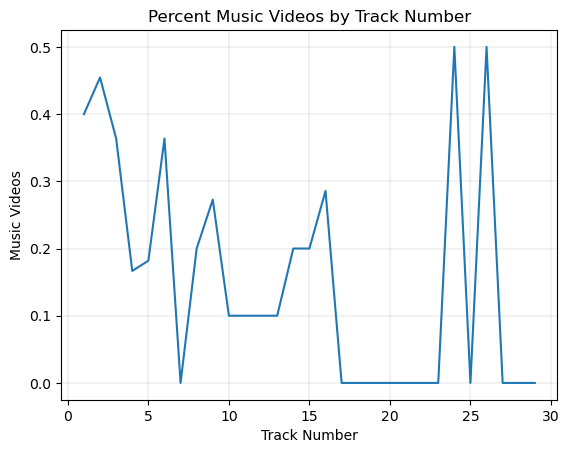

In [14]:
# Music Videos v Track Number

track_avg = list(data.groupby('Track Number')['Music Video'].mean())
track = range(1,30)
ax = sns.lineplot(x=track, y=track_avg)
plt.xlabel('Track Number')
plt.ylabel('Music Videos')
plt.title('Percent Music Videos by Track Number')
ax.grid(visible=True, which='major', color='black', linewidth=0.075);

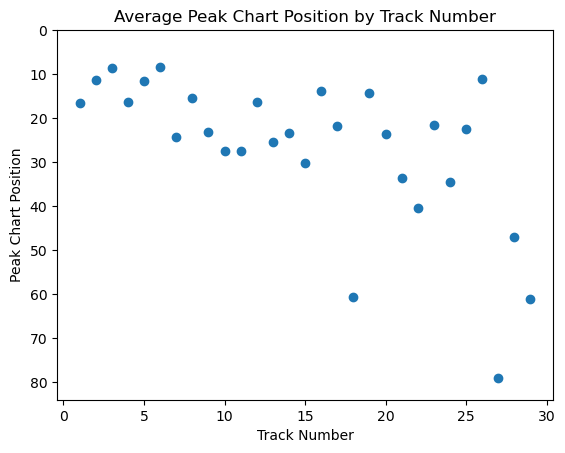

In [15]:
# Track Number v Peak Chart Position

y = list(data.groupby('Track Number').mean()['Peak Chart Position'])
plt.scatter(range(1,30), y)
plt.xlabel('Track Number')
plt.ylabel('Peak Chart Position')
plt.ylim(max(y)+5, 0)
plt.title('Average Peak Chart Position by Track Number');